Dataset Head:
   Operating_hours  Output
0                3       5
1                5       8
2                9       8
3                7       7
4               11       9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Operating_hours  8 non-null      int64
 1   Output           8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes
None


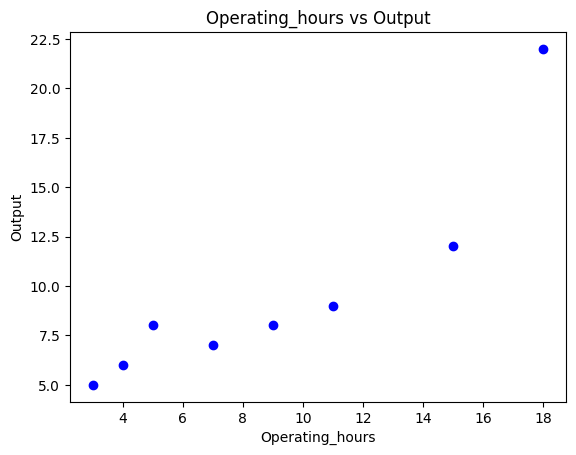

Epoch 2 - Theta: [0.96848981 1.87770142]
Epoch 3 - Theta: [ 0.80363376 -0.09924226]
Predicted output for 13 hours: 4670943.706975194
Mean Squared Error: 13734913068192.547
Epoch 2 - Theta: [-1.23809842 -0.27145614]
Epoch 3 - Theta: [-0.97197434  2.71574588]
Prediction after 500 epochs for 13 hours: -4.504394838028944e+29
Mean Squared Error after 500 epochs: 1.2772973765685218e+59


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Machine.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(data.info())

# Extract predictor and dependent variables
X = data['Operating_hours'].values.reshape(-1, 1)
y = data['Output'].values.reshape(-1, 1)

# Plot the data to visualize relationship
plt.scatter(X, y, color='blue')
plt.xlabel('Operating_hours')
plt.ylabel('Output')
plt.title('Operating_hours vs Output')
plt.show()

# Implement Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        self.theta = np.random.randn(n + 1, 1)  # Initialize weights

        for epoch in range(self.epochs):
            gradients = (2 / m) * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients

            if epoch == 1 or epoch == 2:
                print(f'Epoch {epoch+1} - Theta: {self.theta.ravel()}')

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

# Train the model
model = LinearRegressionGD(learning_rate=0.01, epochs=100)
model.fit(X, y)

# Predict output for 13 hours
prediction = model.predict(np.array([[13]]))
print(f'Predicted output for 13 hours: {prediction[0][0]}')

# Calculate error
y_pred = model.predict(X)
error = np.mean((y - y_pred) ** 2)
print(f'Mean Squared Error: {error}')

# Train the model for more epochs and observe performance
model_long = LinearRegressionGD(learning_rate=0.01, epochs=500)
model_long.fit(X, y)

prediction_long = model_long.predict(np.array([[13]]))
print(f'Prediction after 500 epochs for 13 hours: {prediction_long[0][0]}')
y_pred_long = model_long.predict(X)
error_long = np.mean((y - y_pred_long) ** 2)
print(f'Mean Squared Error after 500 epochs: {error_long}')


Dataset Head:
   Operating_hours  Output
0                3       5
1                5       8
2                9       8
3                7       7
4               11       9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Operating_hours  8 non-null      int64
 1   Output           8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes
None


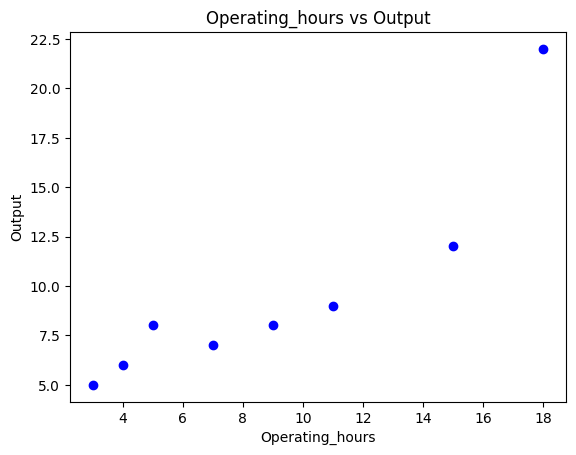

Epoch 2 - Theta: [-0.5748326  -1.26612815]
Epoch 3 - Theta: [-0.14293288  3.71536404]
Predicted output for 13 hours (Gradient Descent): -11773057.963699782
Mean Squared Error (Gradient Descent): 87256676165010.19
Epoch 2 - Theta: [-1.30587515 -1.41779849]
Epoch 3 - Theta: [-0.83205392  4.01758083]
Prediction after 500 epochs for 13 hours (Gradient Descent): -8.194673463280404e+29
Mean Squared Error after 500 epochs (Gradient Descent): 4.227488369245318e+59
Predicted output for 13 hours (Sklearn): 13.228960396039604
Mean Squared Error (Sklearn): 5.2368502475247505


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'Machine.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(data.info())

# Extract predictor and dependent variables
X = data['Operating_hours'].values.reshape(-1, 1)
y = data['Output'].values.reshape(-1, 1)

# Plot the data to visualize relationship
plt.scatter(X, y, color='blue')
plt.xlabel('Operating_hours')
plt.ylabel('Output')
plt.title('Operating_hours vs Output')
plt.show()

# Implement Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        self.theta = np.random.randn(n + 1, 1)  # Initialize weights

        for epoch in range(self.epochs):
            gradients = (2 / m) * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients

            if epoch == 1 or epoch == 2:
                print(f'Epoch {epoch+1} - Theta: {self.theta.ravel()}')

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

# Train the model
model = LinearRegressionGD(learning_rate=0.01, epochs=100)
model.fit(X, y)

# Predict output for 13 hours
prediction = model.predict(np.array([[13]]))
print(f'Predicted output for 13 hours (Gradient Descent): {prediction[0][0]}')

# Calculate error
y_pred = model.predict(X)
error = np.mean((y - y_pred) ** 2)
print(f'Mean Squared Error (Gradient Descent): {error}')

# Train the model for more epochs and observe performance
model_long = LinearRegressionGD(learning_rate=0.01, epochs=500)
model_long.fit(X, y)

prediction_long = model_long.predict(np.array([[13]]))
print(f'Prediction after 500 epochs for 13 hours (Gradient Descent): {prediction_long[0][0]}')
y_pred_long = model_long.predict(X)
error_long = np.mean((y - y_pred_long) ** 2)
print(f'Mean Squared Error after 500 epochs (Gradient Descent): {error_long}')

# Sklearn Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict output for 13 hours using Sklearn
sklearn_prediction = lr_model.predict(np.array([[13]]))
print(f'Predicted output for 13 hours (Sklearn): {sklearn_prediction[0][0]}')

# Calculate error for Sklearn model
sklearn_y_pred = lr_model.predict(X)
sklearn_error = mean_squared_error(y, sklearn_y_pred)
print(f'Mean Squared Error (Sklearn): {sklearn_error}')


Dataset Head:
   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  GarageArea  SalePrice  
0        150          856       1710         548     208500  
1        284         1262       1262         460     181500  
2        434          920       1786         608     223500  
3        540          756       1717         642     140000  
4        490         1145       2198         836     250000  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   

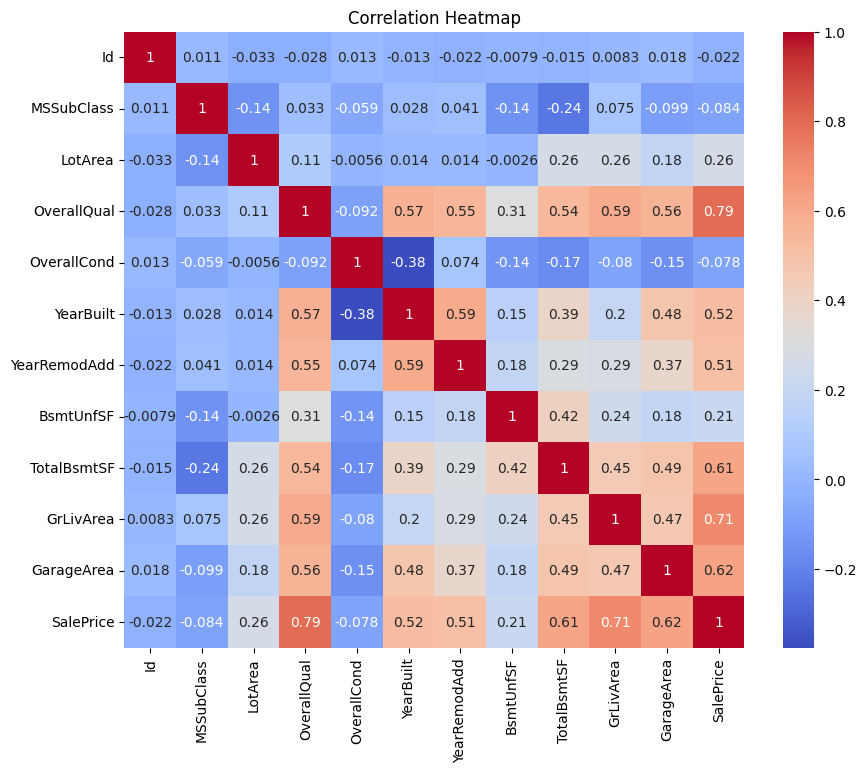

Regression Coefficients: [ -974.89605565 -7233.40138651  4926.11967661 29545.10735552
  3747.83621335 10919.52481357  5359.38138144 -7736.00755408
  9605.95488862 26567.72197246  8095.67953079]
Intercept: 180177.68947167782
Mean Squared Error: 1458343297.1273167
R2 Score: 0.8098720630993708


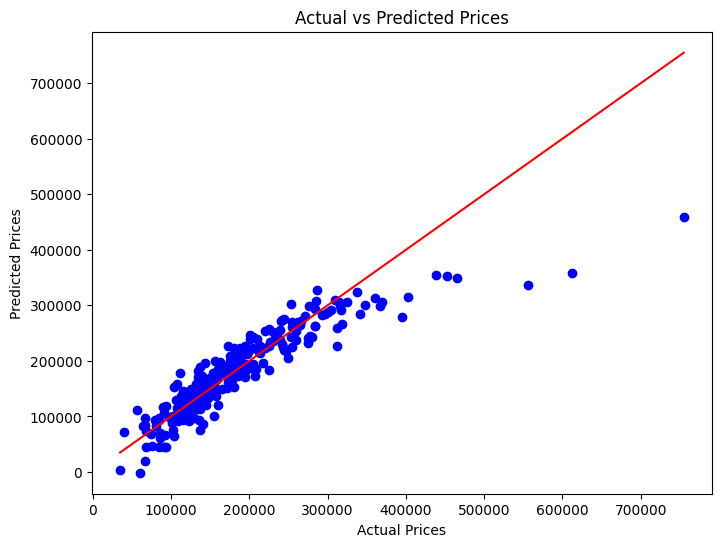

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'housePrice_small.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Print predictor and dependent variables
print("\nDataset Info:")
print(data.info())

# Display correlation heatmap to understand relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the dataset
# Handle categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Handle missing values by filling with median
data.fillna(data.median(), inplace=True)

# Separate predictors and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print regression parameters
print(f'Regression Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Dataset Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

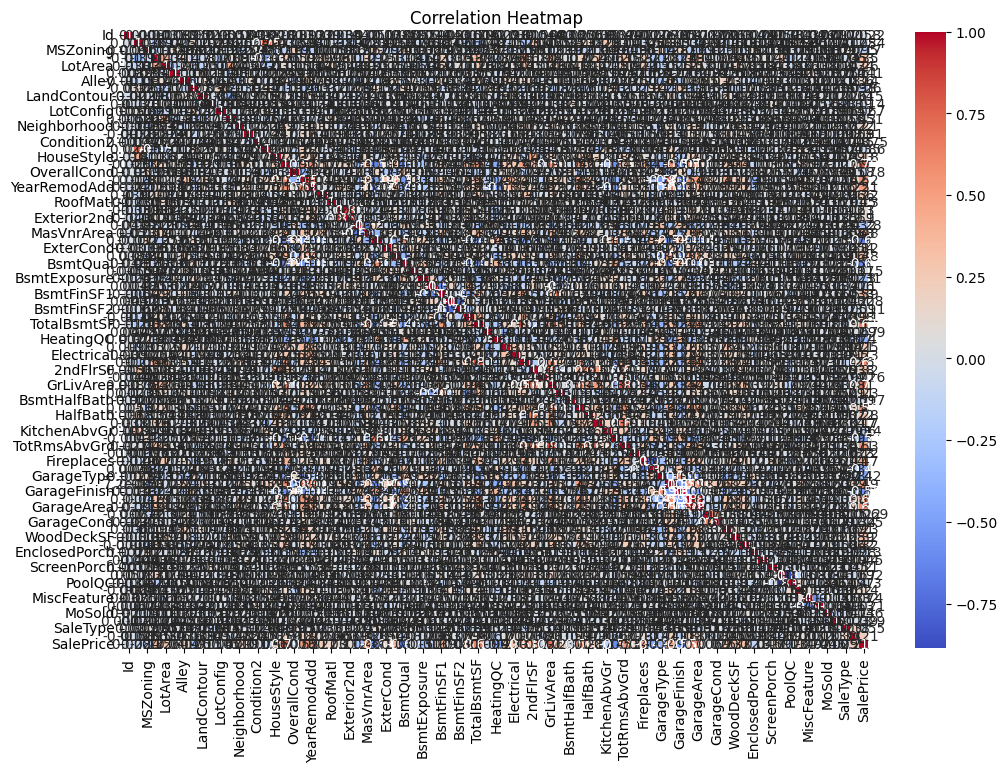

Regression Coefficients: [ -1135.63655883  -5584.39455428  -1324.84996788  -5662.42697273
   3578.81053875   1217.07886015   1775.9715722   -1511.01174071
   2188.773592    -1470.90730966    132.01360793   3024.81308953
   2489.94200883   -695.86649702  -2820.22089569  -2715.54837411
  -1683.02502638  15009.86817469   5632.55902622   6499.36094916
    982.20545665   2129.05811306   3325.01296349  -4810.61263337
   2947.11586558   4361.82406334   6654.82016081  -5843.67987639
    284.06884608    600.14659907  -8743.85861035   2242.29577452
  -4243.28314349   -785.1378052    1323.73290576   1099.93428193
    634.5492749   -1944.1032262    -348.56630663   -158.94360294
   -912.22712773    -61.85405936   -402.37123565   9742.3062697
   6812.09870078  -1083.88656859  12725.93467069   3837.62116662
   -835.33626176   1395.05780592   -442.93377324  -1314.21471296
  -2698.74654497  -7796.85159531   6479.30596524   4640.75905485
   2726.73746918  -1264.81619982   -222.52239185   -112.03996939
 

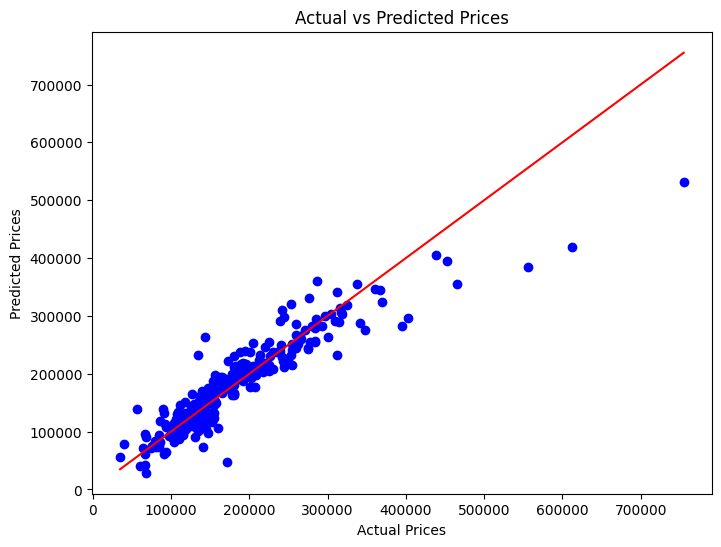

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'housePrice.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Print predictor and dependent variables
print("\nDataset Info:")
print(data.info())

# Handle categorical variables before correlation to avoid errors
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Display correlation heatmap to understand relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the dataset
# Handle missing values by filling with median
data.fillna(data.median(), inplace=True)

# Separate predictors and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print regression parameters
print(f'Regression Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
